In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv('data/stock_data.csv', parse_dates=['Date'], index_col='Date')
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.248108,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,174.944778,54764400
2023-10-19,176.039993,177.839996,175.190002,175.460007,174.566727,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,171.999863,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.119247,55980100


In [3]:
# Aperçu de la structure des données
print("Dimensions des données :", df.shape)
print("Aperçu des informations générales :")
df.info()

# Statistiques descriptives
df.describe()

Dimensions des données : (252, 6)
Aperçu des informations générales :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-17 to 2024-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,196.478730,198.262302,194.798016,196.635278,196.227395,5.883336e+07
std,20.809996,21.045345,20.401666,20.781097,20.975428,3.012635e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,1.306984e+07
25%,181.270004,182.759995,179.889999,181.524998,180.947189,4.360965e+07
50%,190.919998,192.134995,189.620003,191.139999,190.633041,5.259280e+07
75%,218.754997,220.497505,216.037495,218.404999,218.152489,6.502268e+07
max,236.479996,237.490005,233.089996,234.820007,234.548523,3.186799e+08


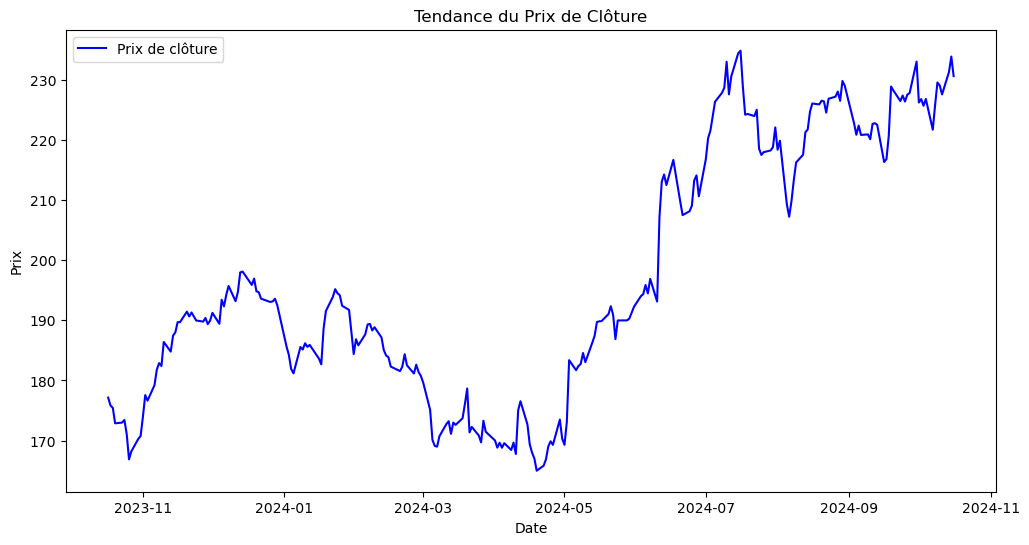

In [4]:
# Visualisation des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Prix de clôture', color='blue')
plt.title('Tendance du Prix de Clôture')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

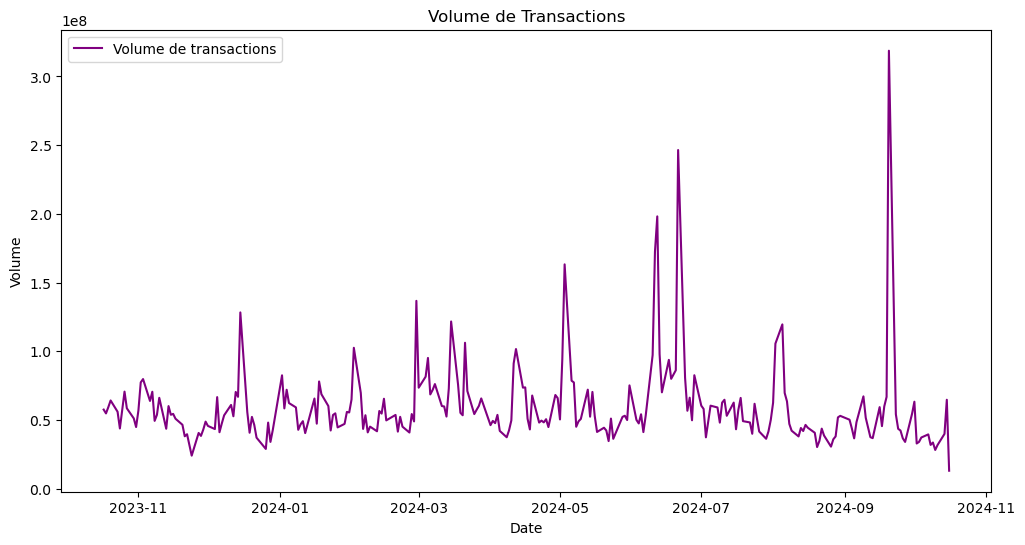

In [5]:
# Visualisation des volumes de transactions
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Volume de transactions', color='purple')
plt.title('Volume de Transactions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

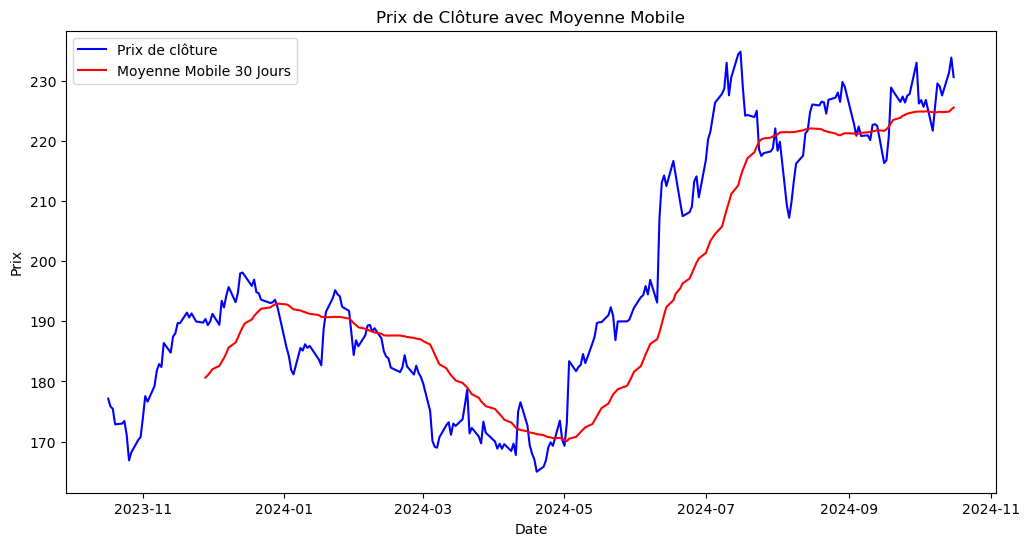

In [6]:
# Calcul de la moyenne mobile
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Visualisation des prix de clôture avec moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Prix de clôture', color='blue')
plt.plot(df['MA_30'], label='Moyenne Mobile 30 Jours', color='red')
plt.title('Prix de Clôture avec Moyenne Mobile')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

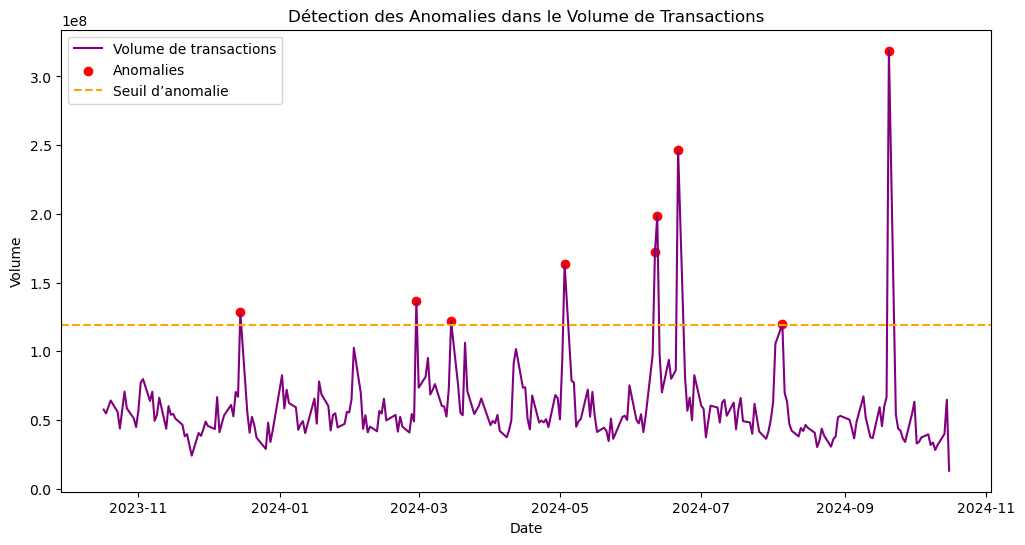

,Open,High,Low,Close,Adj Close,Volume,MA_30
Date,,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,196.823120,128256700,189.661667
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.296478,136682600,187.000999
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.186874,121664700,180.170333
2024-05-03,186.649994,187.000000,182.660004,183.380005,182.919876,163224100,170.488000
2024-06-11,193.649994,207.160004,193.630005,207.149994,206.910492,172373300,188.150333
2024-06-12,207.369995,220.199997,206.899994,213.070007,212.823669,198134300,189.574999
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.250122,246421400,196.318332
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.028061,119548600,221.461334
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900,223.494334


In [7]:
# Calcul du seuil pour les volumes élevés
threshold = df['Volume'].mean() + 2 * df['Volume'].std()

# Filtrer les jours où le volume dépasse le seuil
anomalies = df[df['Volume'] > threshold]

# Visualisation des anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Volume de transactions', color='purple')
plt.scatter(anomalies.index, anomalies['Volume'], color='red', label='Anomalies')
plt.axhline(y=threshold, color='orange', linestyle='--', label='Seuil d’anomalie')
plt.title('Détection des Anomalies dans le Volume de Transactions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Affichage des anomalies détectées
anomalies

# Conclusion

Dans cette analyse exploratoire, nous avons :
1. Examiné les tendances de prix de clôture et de volume de transactions pour identifier des mouvements importants.
2. Utilisé la moyenne mobile pour lisser les variations et mieux visualiser les tendances à long terme.
3. Mis en place un mécanisme de détection des anomalies dans le volume de transactions, révélant des périodes d’activité anormale.

Ces analyses de base ouvrent la voie à des explorations plus approfondies pour des stratégies d'investissement potentielles et des modèles prédictifs.